# Implementasi Dynamic Time Warping dan K-means Clustering untuk Pengelompokan Emisi CO2 Sektor Transportasi di Kawasan Asia Pasifik



# Install Packages and Import Libraries

Install Packages

In [ ]:
!pip install pyts
!pip install yfinance
!pip install dtaidistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.0 MB/s eta 0:00:00


Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from dtaidistance import dtw
from scipy.stats import pearsonr
import pandas as pd
import pyts
from pyts.metrics import dtw
from sklearn.cluster import KMeans
import yfinance as yf
import requests

# Input Data and Preprocessing

Input Data

In [ ]:
df = pd.read_csv("damingemisi.csv")
df

,Year,Australia,Brunei Darussalam,China,Algeria,Indonesia,Japan,Cambodia,"Korea, Rep.",Lao PDR,Myanmar,Malaysia,Philippines,Singapore,Thailand,Timor-Leste,Viet Nam
0,2003,76.408,0.923,313.144,21.760,69.274,256.840,1.352,88.301,0.926,3.884,38.116,25.497,5.305,52.257,0.060,15.652
1,2004,79.182,0.974,371.137,22.025,70.829,256.793,1.374,88.948,0.963,4.318,40.958,26.387,5.410,56.129,0.060,19.162
2,2005,79.333,0.952,397.312,24.162,69.838,254.018,1.503,86.065,1.004,4.752,40.697,25.114,5.594,56.158,0.067,19.361
3,2006,81.252,1.031,434.812,25.627,66.295,250.134,1.606,85.964,1.067,3.989,38.996,23.583,5.812,52.663,0.071,19.337
4,2007,83.578,1.126,468.577,27.601,67.814,242.909,2.004,88.637,1.173,4.484,41.526,23.713,6.007,55.630,0.071,22.636
5,2008,85.299,1.132,507.068,29.192,72.070,233.810,2.070,84.169,1.346,2.095,43.618,22.724,6.124,51.976,0.091,24.101
6,2009,84.684,1.122,517.075,30.516,81.682,227.636,2.689,85.067,1.509,2.193,42.746,23.590,6.701,54.906,0.108,28.928
7,2010,87.630,1.176,568.780,31.711,89.114,228.650,2.947,86.613,1.522,2.302,44.101,23.749,6.786,55.660,0.132,31.070
8,2011,89.768,1.284,621.890,34.219,108.496,223.027,3.122,85.125,1.513,2.356,44.628,23.530,7.247,58.488,0.141,30.512
9,2012,90.425,1.343,686.126,38.643,129.625,220.699,3.294,87.584,1.688,3.029,44.397,24.494,7.011,60.456,0.165,30.057


  Mengecek Jumlah Kolom

In [ ]:
num_cols = len(df.columns)

# Print the result.
print(f"Ada {num_cols} kolom di df.")


Ada 17 kolom di df.


Merename kolom yang memiliki lebih dari satu kata

In [ ]:
# Rename columns
df = df.rename(
    columns={
        "Brunei Darussalam": "Brunei",
        "Korea, Rep.": "Korsel",
        "Lao PDR": "Laos",
        "Timor-Leste": "Timor",
        "Viet Nam": "Vietnam",
    }
)
# Display the first few rows to verify the changes
df.head()


,Year,Australia,Brunei,China,Algeria,Indonesia,Japan,Cambodia,Korsel,Laos,Myanmar,Malaysia,Philippines,Singapore,Thailand,Timor,Vietnam
0,2003,76.408,0.923,313.144,21.760,69.274,256.840,1.352,88.301,0.926,3.884,38.116,25.497,5.305,52.257,0.060,15.652
1,2004,79.182,0.974,371.137,22.025,70.829,256.793,1.374,88.948,0.963,4.318,40.958,26.387,5.410,56.129,0.060,19.162
2,2005,79.333,0.952,397.312,24.162,69.838,254.018,1.503,86.065,1.004,4.752,40.697,25.114,5.594,56.158,0.067,19.361
3,2006,81.252,1.031,434.812,25.627,66.295,250.134,1.606,85.964,1.067,3.989,38.996,23.583,5.812,52.663,0.071,19.337
4,2007,83.578,1.126,468.577,27.601,67.814,242.909,2.004,88.637,1.173,4.484,41.526,23.713,6.007,55.630,0.071,22.636


Membuat variabel dari setiap negara

In [ ]:

# Iterate through each column in the DataFrame, excluding the 'Year' column.
for col in df.columns:
    if col != 'Year':
        # Create a variable with the column name and assign the corresponding column data to it.
        globals()[col] = df[col]
        # print a confirmation message
        print(f"{col} = df['{col}']")

Australia = df['Australia']
Brunei = df['Brunei']
China = df['China']
Algeria = df['Algeria']
Indonesia = df['Indonesia']
Japan = df['Japan']
Cambodia = df['Cambodia']
Korsel = df['Korsel']
Laos = df['Laos']
Myanmar = df['Myanmar']
Malaysia = df['Malaysia']
Philippines = df['Philippines']
Singapore = df['Singapore']
Thailand = df['Thailand']
Timor = df['Timor']
Vietnam = df['Vietnam']


# Eksplorasi

Membuat plot Emmisi CO2 sektor transportasi dari setiap negara yang tersedia selama 2003-2022

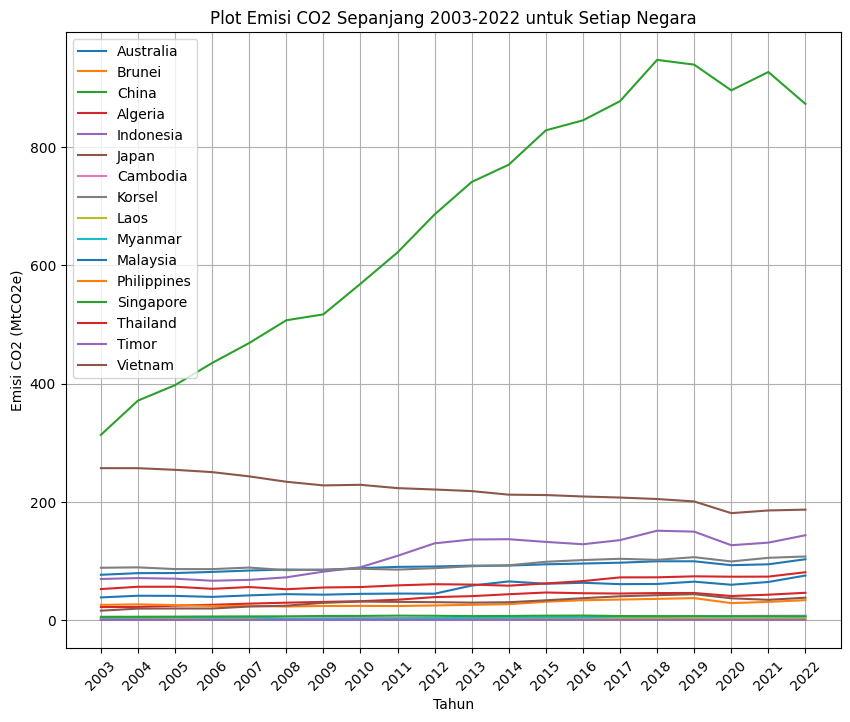

In [ ]:
df_melted = pd.melt(df, id_vars=['Year'], var_name='Country', value_name='Value')
df_melted['Year'] = df_melted['Year'].astype(int)

# Create the line plot
plt.figure(figsize=(10, 8))
for country in df_melted['Country'].unique():
    country_data = df_melted[df_melted['Country'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)


# Pastikan sumbu X menampilkan tahun utuh
plt.xticks(ticks=df['Year'], labels=df['Year'], rotation=45)
plt.xlabel('Tahun')
plt.ylabel('Emisi CO2 (MtCO2e)')
plt.title('Plot Emisi CO2 Sepanjang 2003-2022 untuk Setiap Negara')
plt.legend()
plt.grid(True)
plt.show()

# DTW

Melakukan analisis DTW

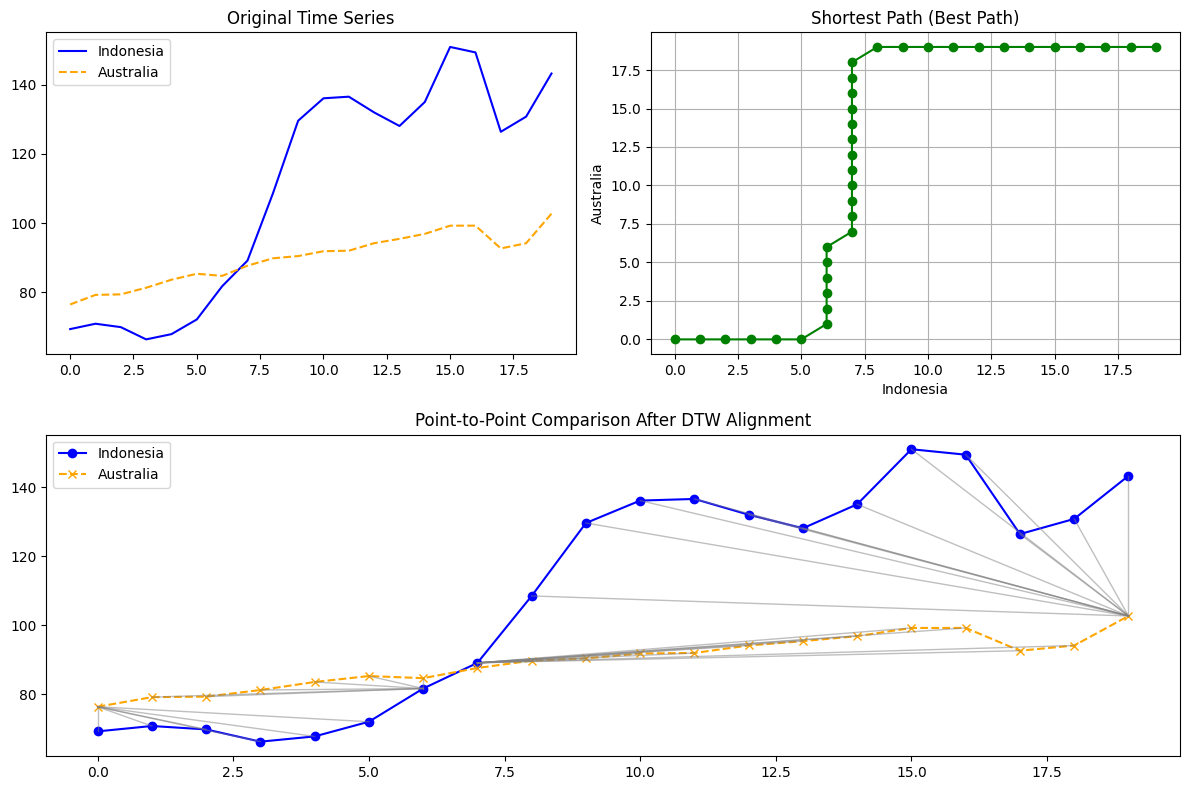

Similarity Score for Australia: 3.26746465168332


In [ ]:
distanceAus, pathsAus = dtw.warping_paths(Indonesia, Australia, use_c=False)
best_pathAus = dtw.best_path(pathsAus)
similarity_scoreAus = distanceAus / len(best_pathAus)
plt.figure(figsize=(12, 8))

# Original Time Series Plot
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(Indonesia, label='Indonesia', color='blue')
ax1.plot(Australia, label='Australia', linestyle='--',color='orange')
ax1.set_title('Original Time Series')
ax1.legend()

# Shortest Path Plot (Cost Matrix with the path)
# In this example, only the path is plotted, not the entire cost matrix.

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(np.array(best_pathAus)[:, 0], np.array(best_pathAus)[:, 1], 'green', marker='o', linestyle='-')
ax2.set_title('Shortest Path (Best Path)')
ax2.set_xlabel('Indonesia')
ax2.set_ylabel('Australia')
ax2.grid(True)

# Point-to-Point Comparison Plot
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.plot(Indonesia, label='Indonesia', color='blue', marker='o')
ax3.plot(Australia, label='Australia', color='orange', marker='x', linestyle='--')
for a, b in best_pathAus:
    ax3.plot([a, b], [Indonesia[a], Australia[b]], color='grey', linestyle='-', linewidth=1, alpha = 0.5)
ax3.set_title('Point-to-Point Comparison After DTW Alignment')
ax3.legend()

plt.tight_layout()
plt.show()
print(f"Similarity Score for Australia: {similarity_scoreAus}")

Membuat fungsi analisis DTW

In [ ]:

def visualize_dtw_alignment(time_series_a, time_series_b):
    """
    Calculates Dynamic Time Warping (DTW) distance, visualizes the alignment,
    and returns the similarity score.

    Args:
        time_series_a: The first time series (numpy array or list).
        time_series_b: The second time series (numpy array or list).
        name_a: Name of the first time series (for plot titles).
        name_b: Name of the second time series (for plot titles).

    Returns:
        similarity_score: The DTW similarity score between the two time series.
    """
    distance, paths = dtw.warping_paths(time_series_a, time_series_b, use_c=False)
    best_path = dtw.best_path(paths)
    similarity_score = distance / len(best_path)

    plt.figure(figsize=(12, 8))
    name_a  = time_series_a.name
    name_b = time_series_b.name

    # Original Time Series Plot
    ax1 = plt.subplot2grid((2, 2), (0, 0))
    ax1.plot(time_series_a, label=name_a, color='blue')
    ax1.plot(time_series_b, label=name_b, linestyle='--', color='orange')
    ax1.set_title(f'Original Time Series ({name_a} vs. {name_b})')  # Updated title
    ax1.legend()

    # Shortest Path Plot (Cost Matrix with the path)
    ax2 = plt.subplot2grid((2, 2), (0, 1))
    ax2.plot(np.array(best_path)[:, 0], np.array(best_path)[:, 1], 'green', marker='o', linestyle='-')
    ax2.set_title('Shortest Path (Best Path)')
    ax2.set_xlabel(name_a)  # Updated label
    ax2.set_ylabel(name_b)  # Updated label
    ax2.grid(True)

    # Point-to-Point Comparison Plot
    ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
    ax3.plot(time_series_a, label=name_a, color='blue', marker='o')
    ax3.plot(time_series_b, label=name_b, color='orange', marker='x', linestyle='--')
    for a, b in best_path:
        ax3.plot([a, b], [time_series_a[a], time_series_b[b]], color='grey', linestyle='-', linewidth=1, alpha=0.5)
    ax3.set_title(f'Point-to-Point Comparison After DTW Alignment ({name_a} vs. {name_b})')  # Updated title
    ax3.legend()

    plt.tight_layout()
    plt.show()
    results_df = pd.DataFrame({
    'Metric': ['DTW Similarity Score'],
    'Value': [similarity_score]})
    results_df['Description'] = [
    "Lower scores indicate greater similarity between the time series."]
    print(results_df)

    return similarity_score

# Example usage:
# similarity = visualize_dtw_alignment(Indonesia, Australia, name_a='Indonesia', name_b='Australia')
# print(f"Similarity Score: {similarity}")

Melakukan analisis DTW di emisi CO2 transportasi di Indonesia dengan negara lainnya

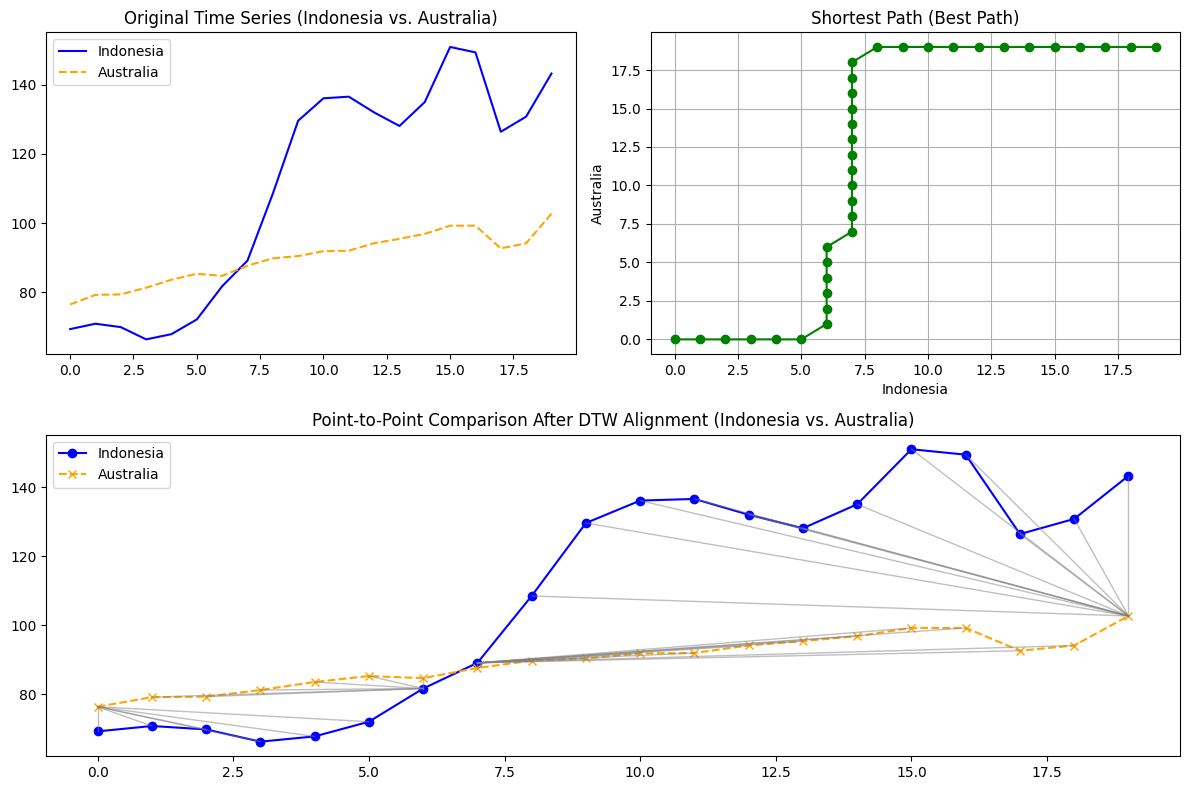

                 Metric     Value  \
0  DTW Similarity Score  3.267465   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


3.26746465168332

In [ ]:
visualize_dtw_alignment(Indonesia, Australia)

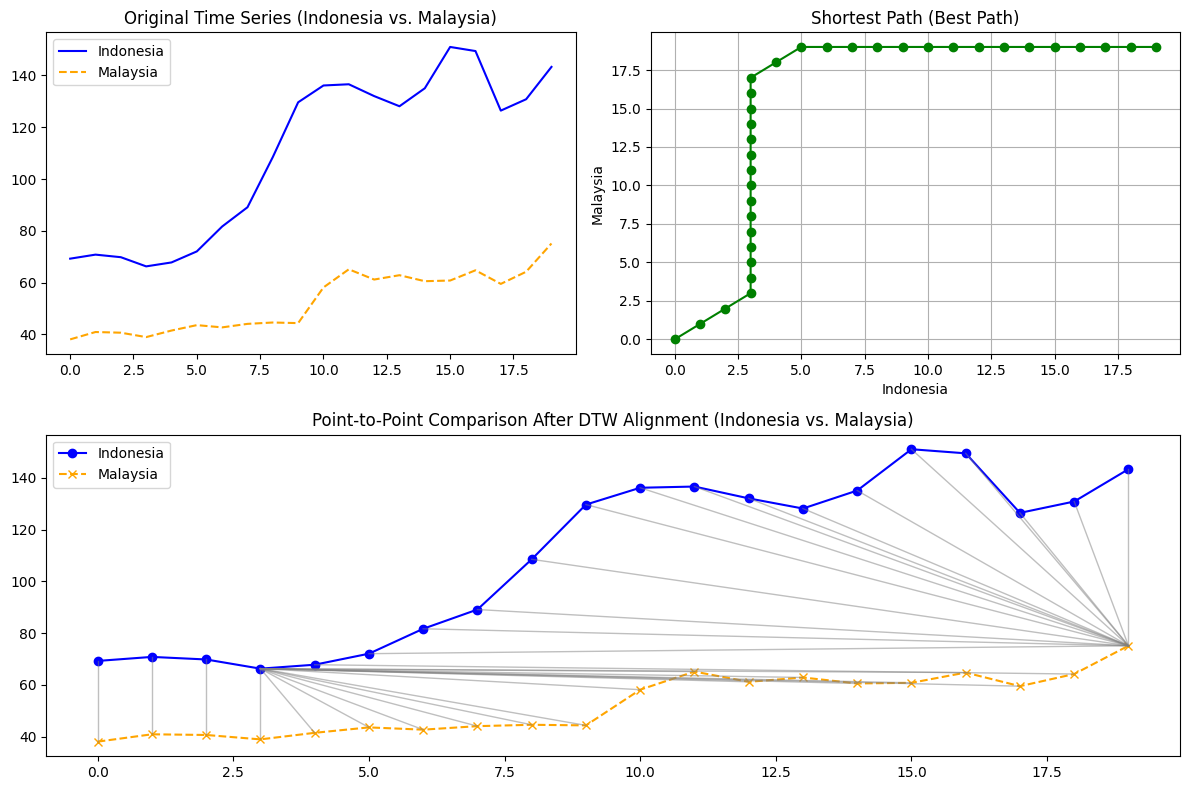

                 Metric     Value  \
0  DTW Similarity Score  6.571361   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


6.571360650988752

In [ ]:
visualize_dtw_alignment(Indonesia, Malaysia)


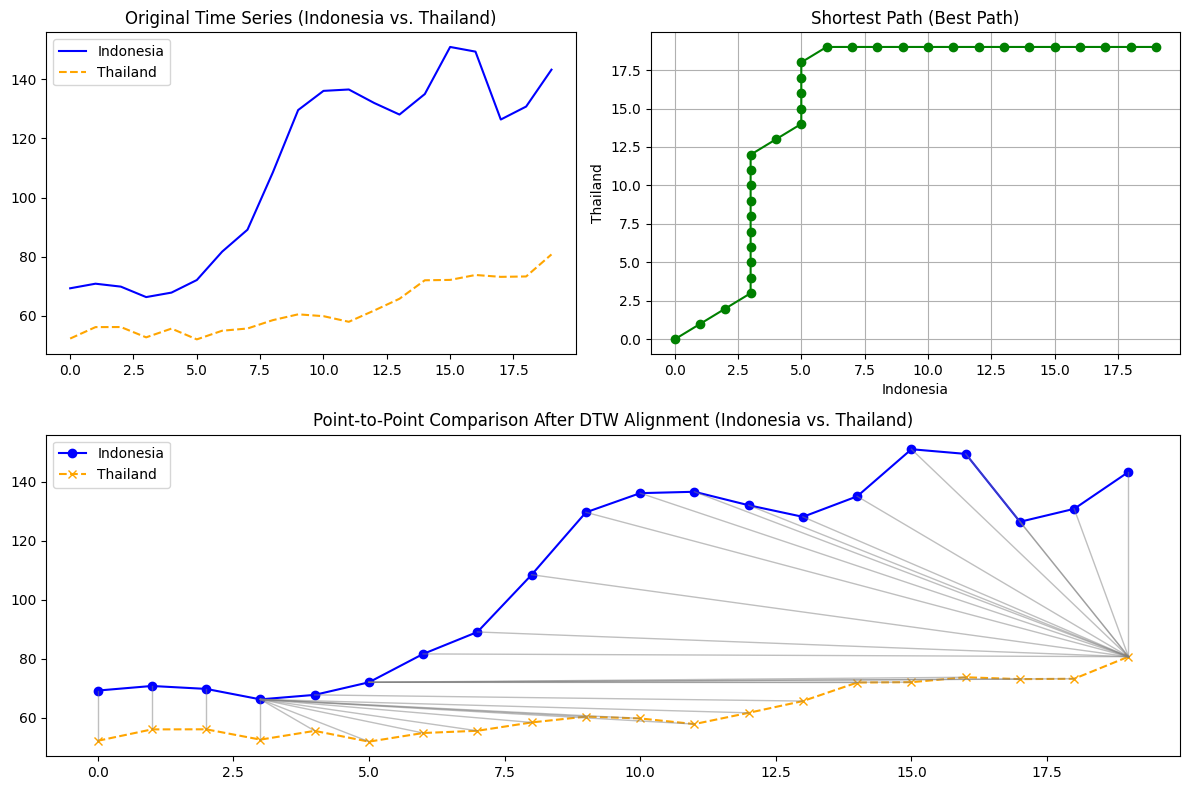

                 Metric     Value  \
0  DTW Similarity Score  5.834113   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


5.83411302974955

In [ ]:
visualize_dtw_alignment(Indonesia, Thailand)

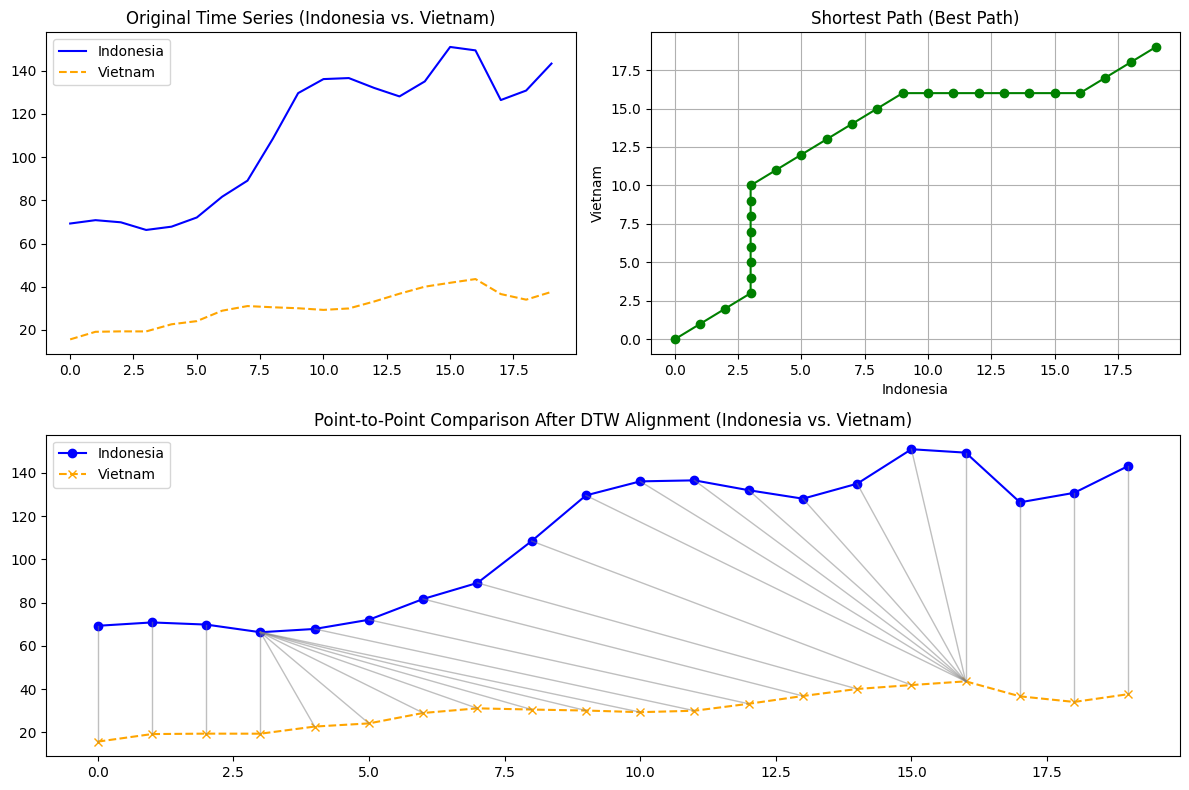

                 Metric      Value  \
0  DTW Similarity Score  13.440328   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


13.440327505154634

In [ ]:
visualize_dtw_alignment(Indonesia, Vietnam)


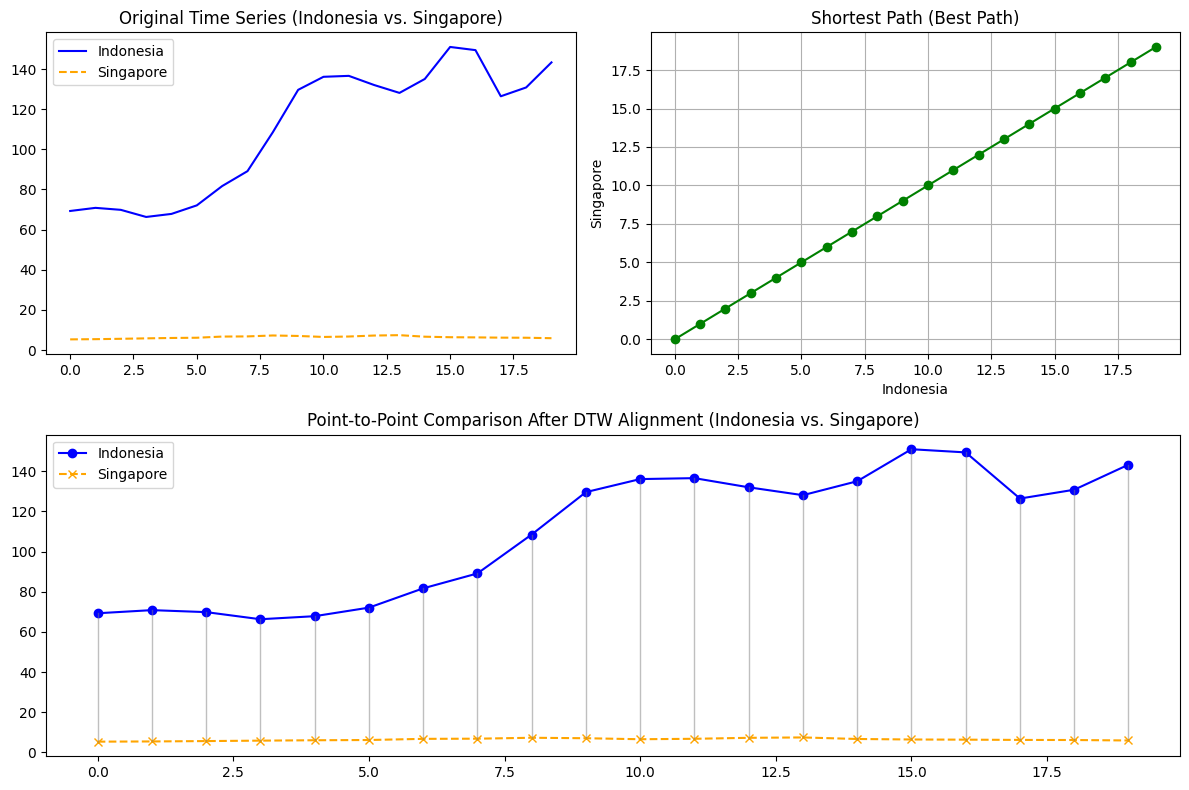

                 Metric      Value  \
0  DTW Similarity Score  24.113213   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


24.113213192666798

In [ ]:
visualize_dtw_alignment(Indonesia, Singapore)


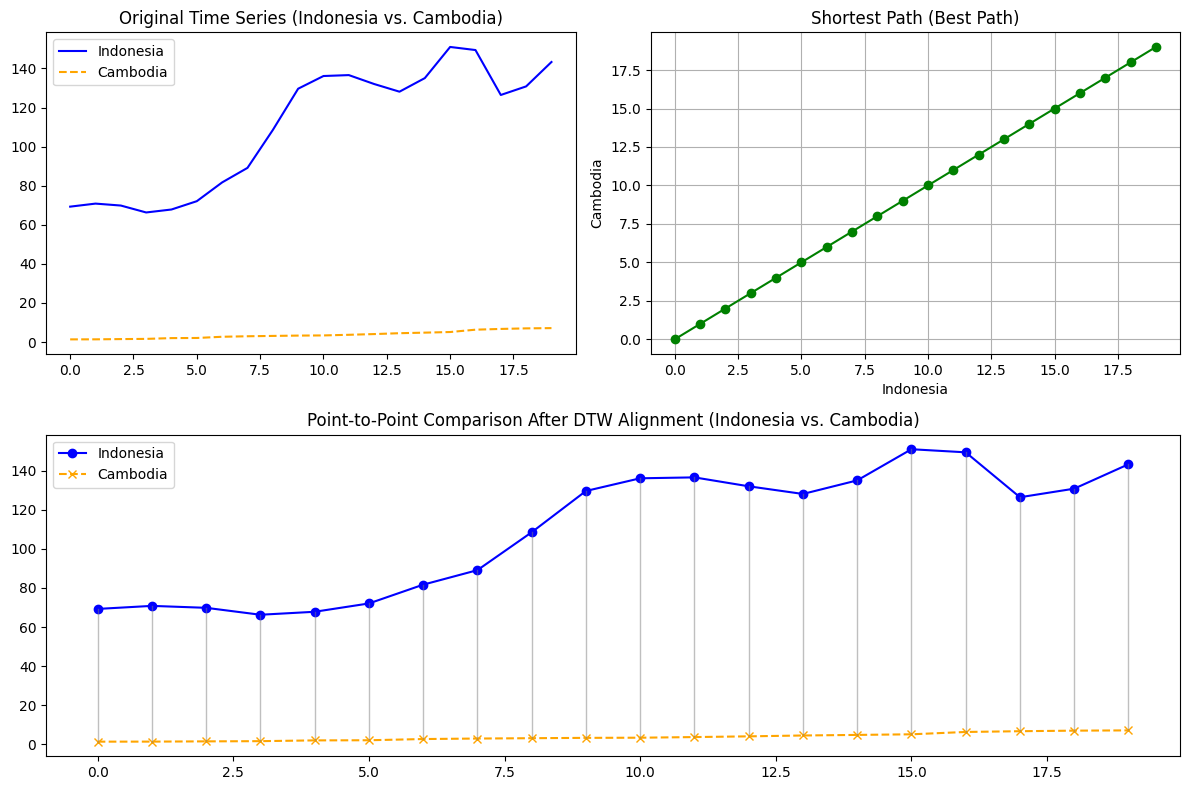

                 Metric      Value  \
0  DTW Similarity Score  24.602105   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


24.6021048353083

In [ ]:
visualize_dtw_alignment(Indonesia, Cambodia)


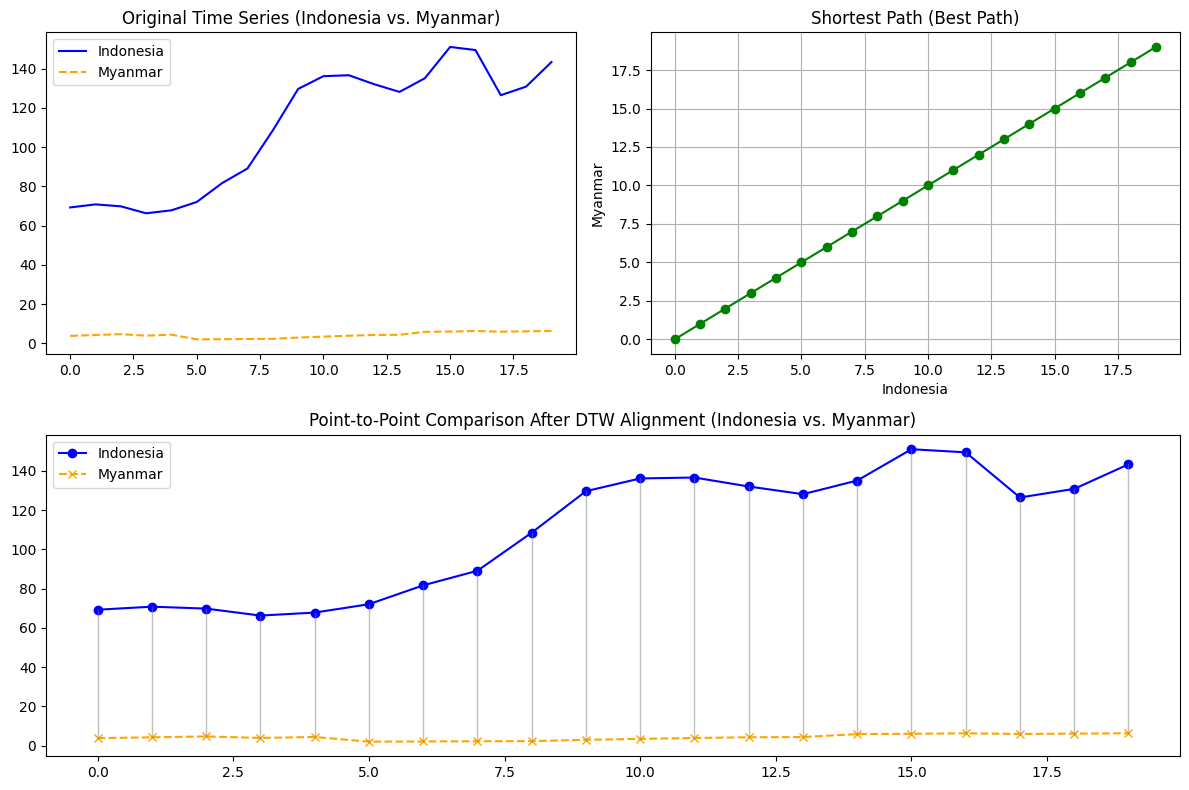

                 Metric      Value  \
0  DTW Similarity Score  24.522701   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


24.52270119669732

In [ ]:
visualize_dtw_alignment(Indonesia, Myanmar)


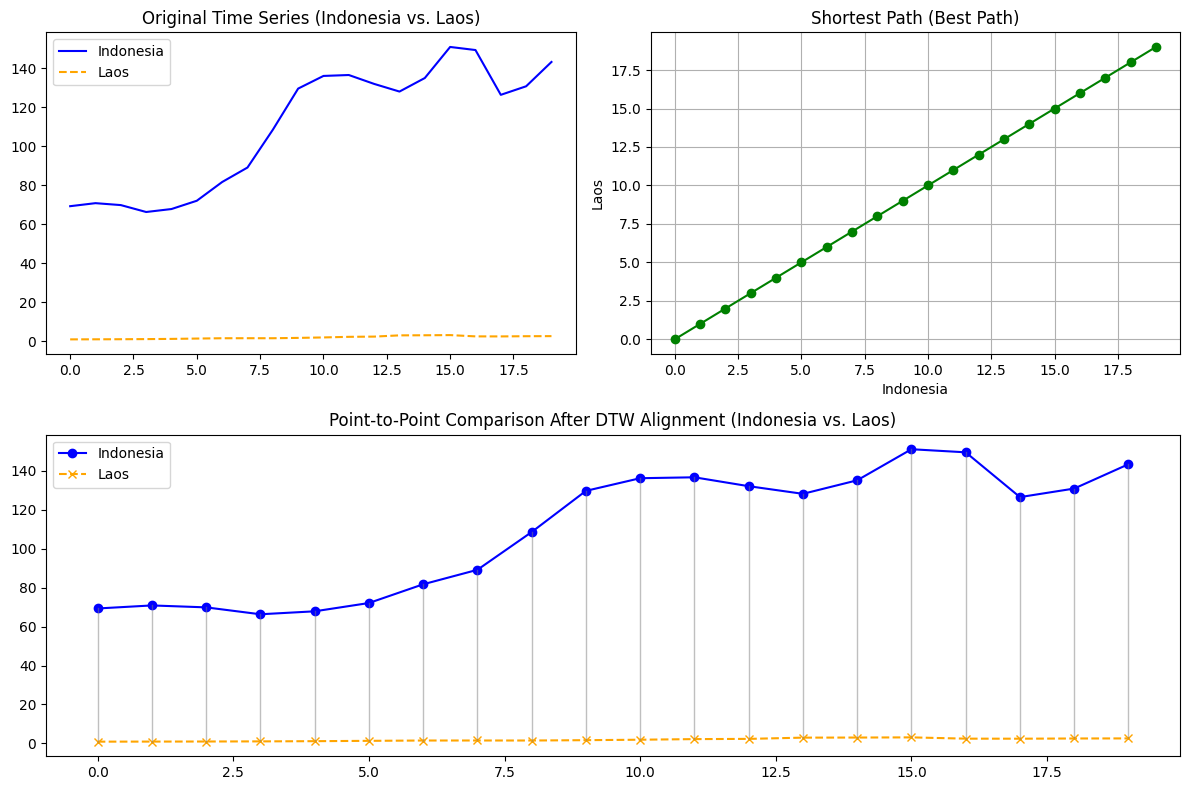

                 Metric      Value  \
0  DTW Similarity Score  25.046407   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


25.046406994866548

In [ ]:
visualize_dtw_alignment(Indonesia, Laos)


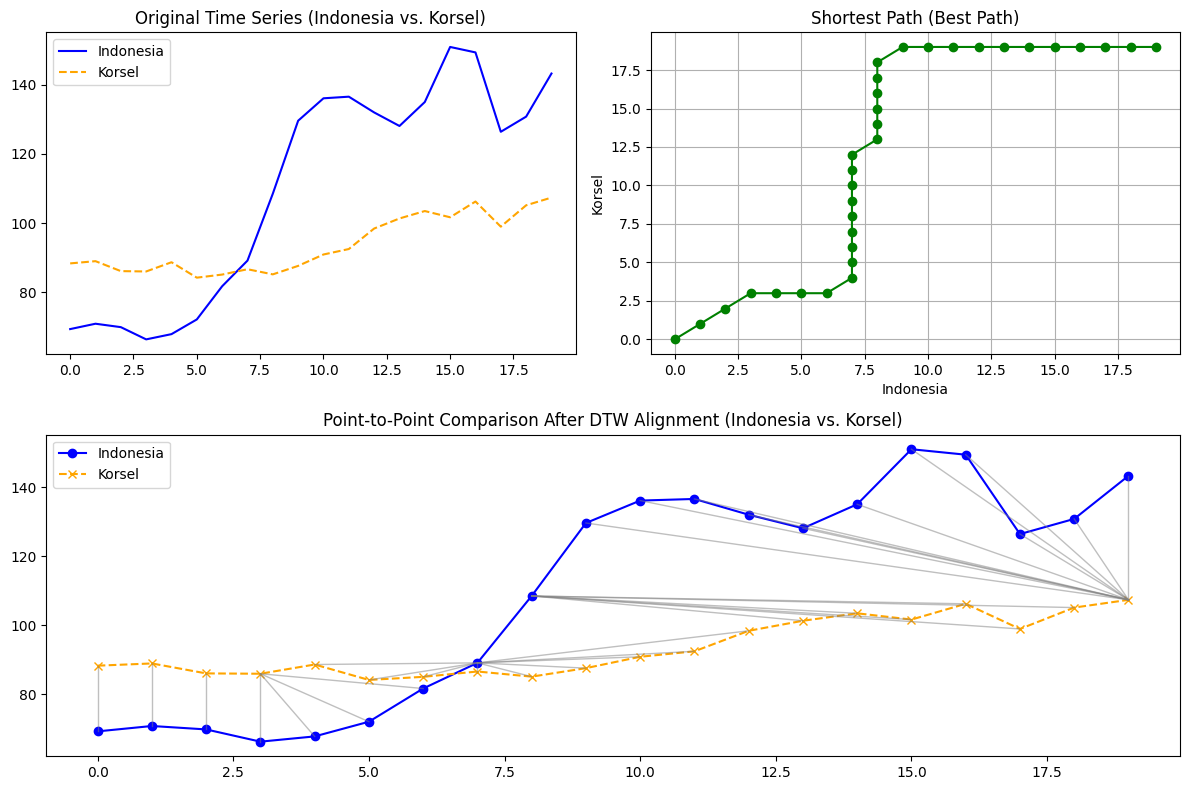

                 Metric     Value  \
0  DTW Similarity Score  3.337908   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


3.337907566692537

In [ ]:
visualize_dtw_alignment(Indonesia, Korsel)


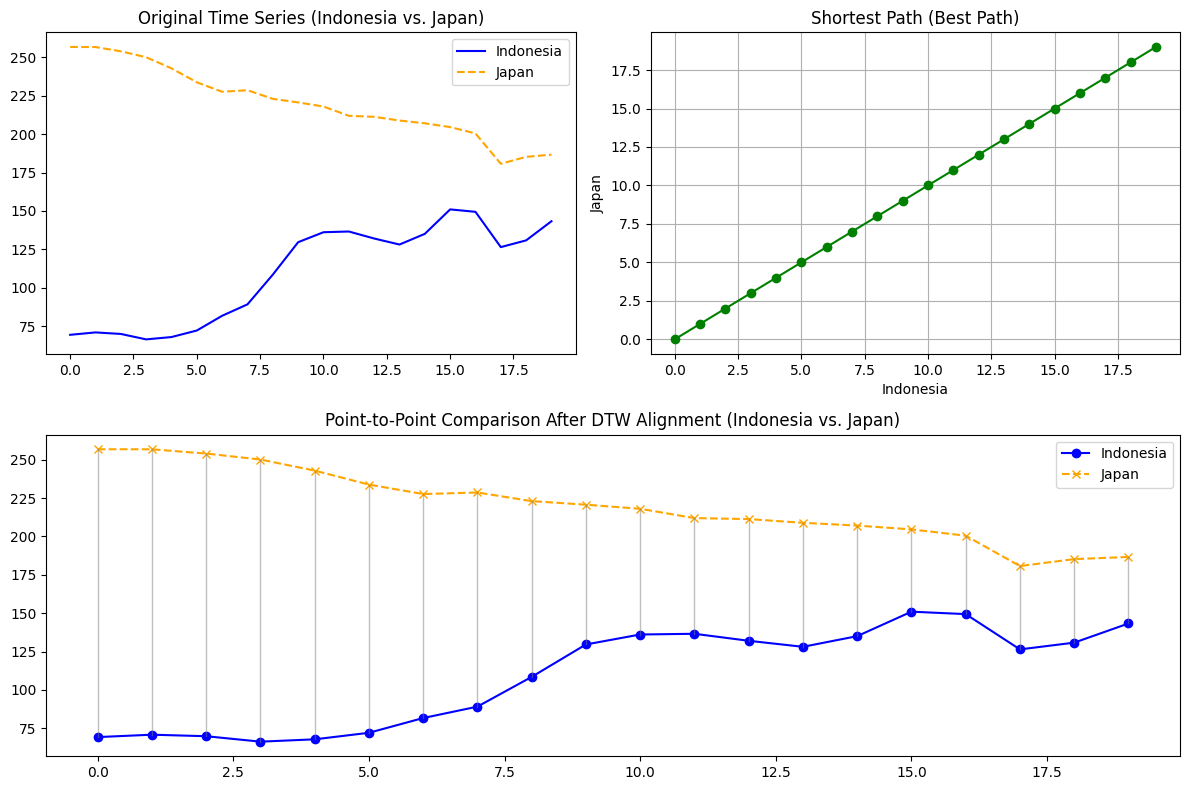

                 Metric      Value  \
0  DTW Similarity Score  27.393384   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


27.39338439573504

In [ ]:
visualize_dtw_alignment(Indonesia, Japan)


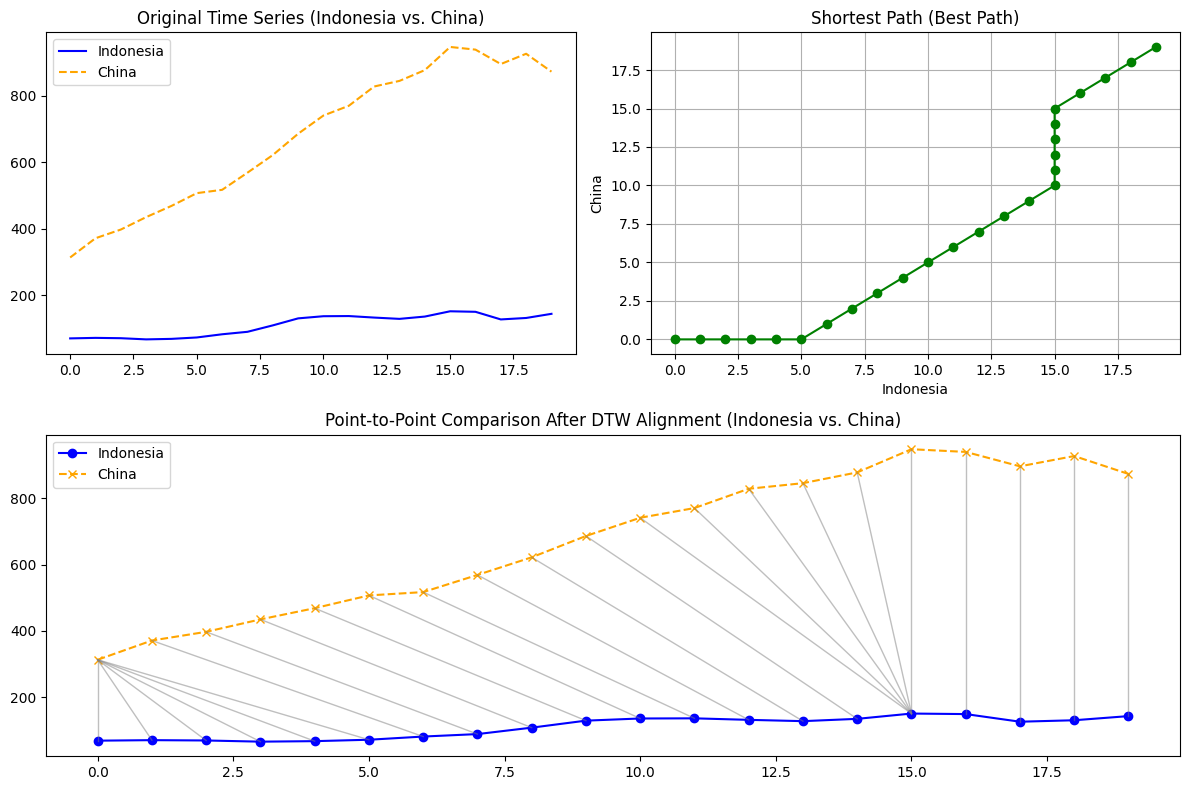

                 Metric       Value  \
0  DTW Similarity Score  105.808647   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


105.80864728183231

In [ ]:
visualize_dtw_alignment(Indonesia, China)


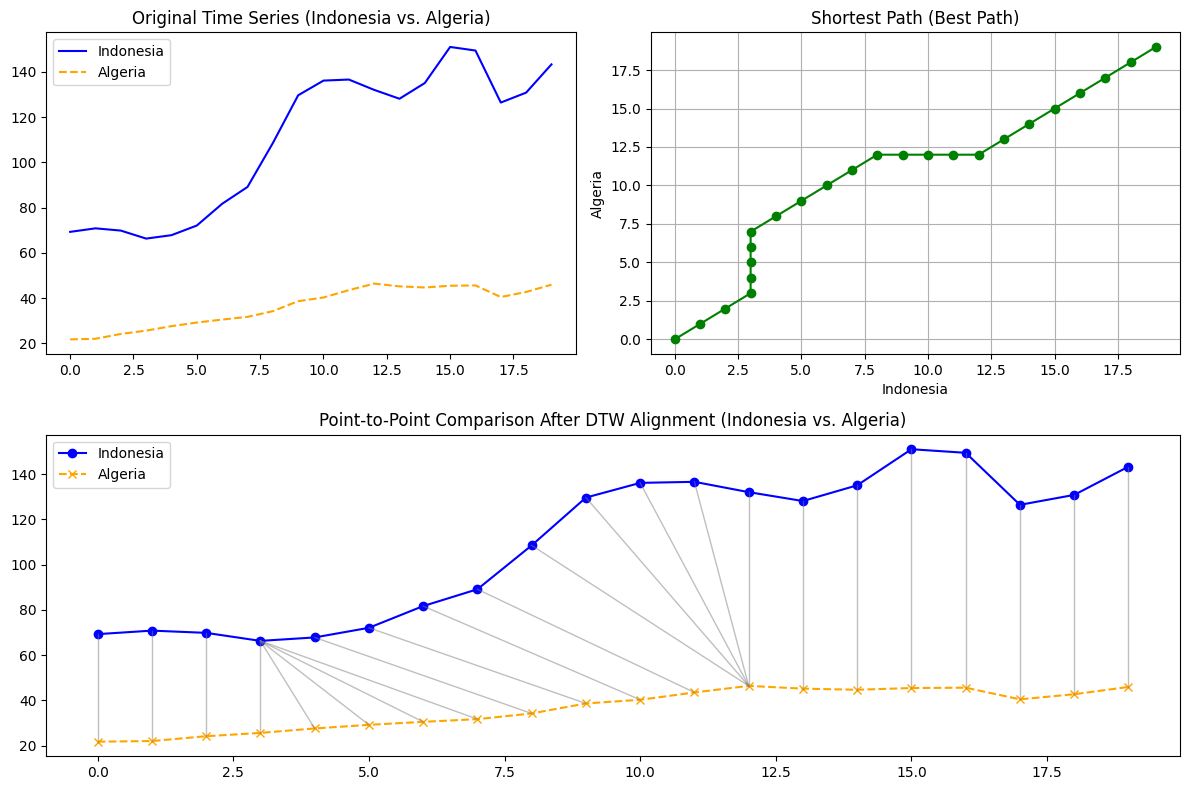

                 Metric      Value  \
0  DTW Similarity Score  14.168868   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


14.16886752457018

In [ ]:
visualize_dtw_alignment(Indonesia, Algeria)


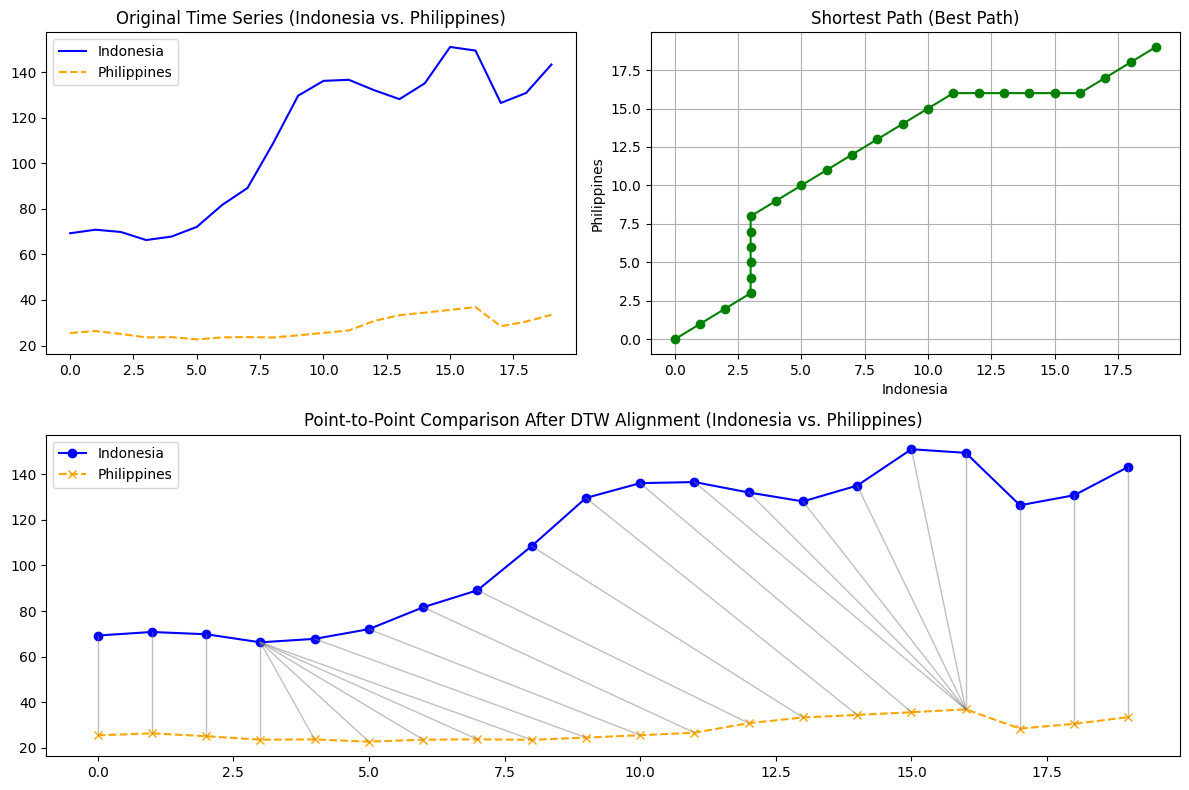

                 Metric      Value  \
0  DTW Similarity Score  15.308399   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


15.308399093255963

In [ ]:
visualize_dtw_alignment(Indonesia, Philippines)


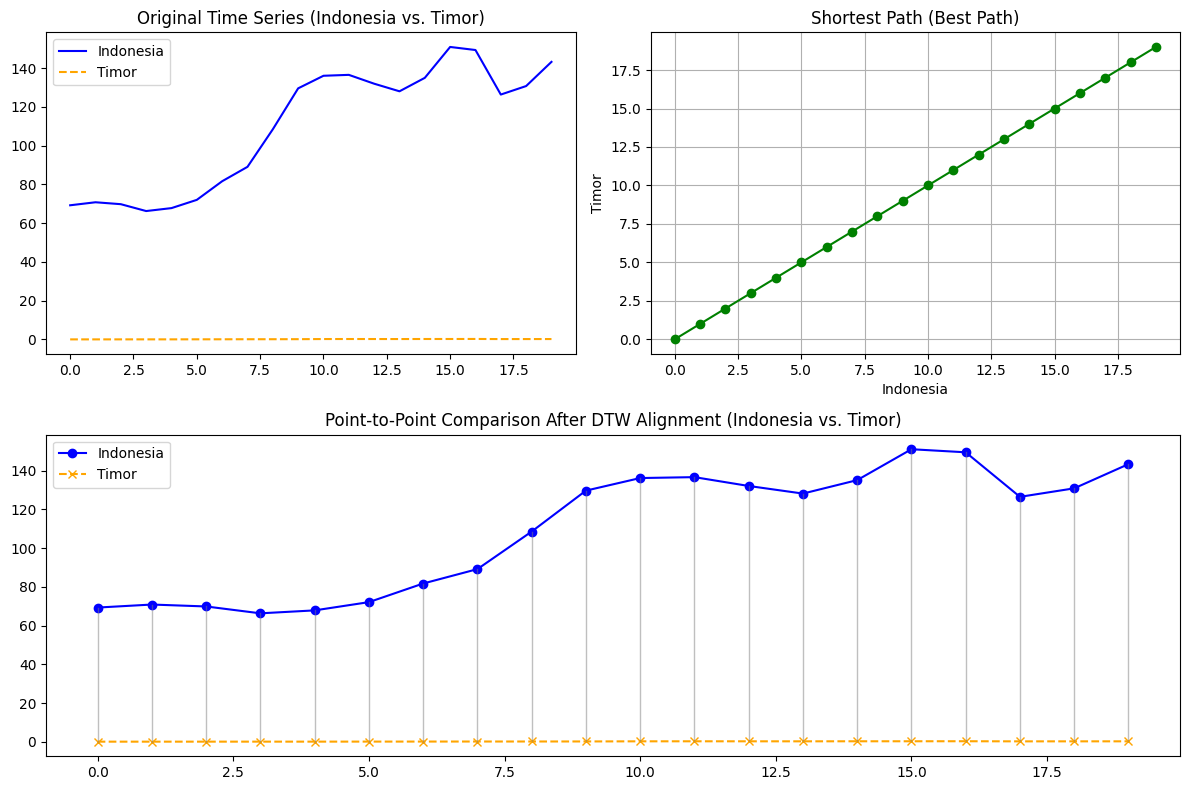

                 Metric      Value  \
0  DTW Similarity Score  25.457802   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


25.457801884294724

In [ ]:
visualize_dtw_alignment(Indonesia, Timor)

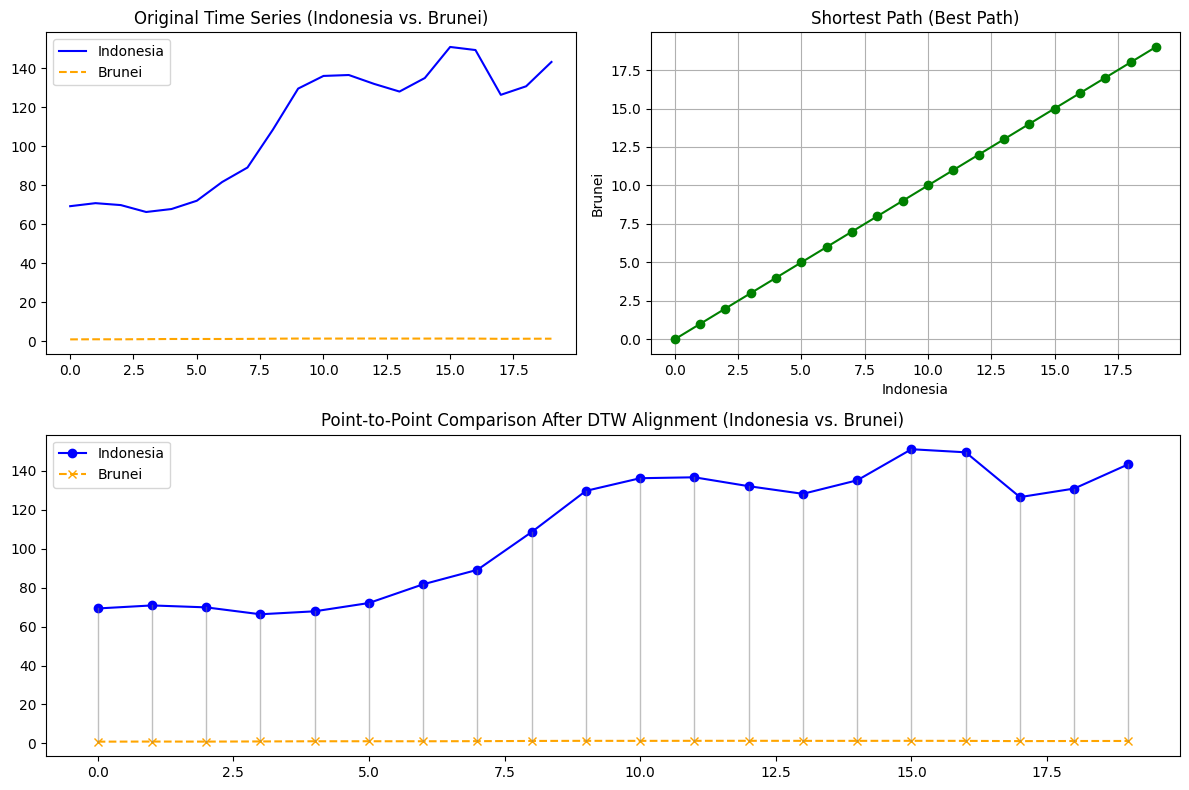

                 Metric      Value  \
0  DTW Similarity Score  25.230951   

                                         Description  
0  Lower scores indicate greater similarity betwe...  


25.23095082463204

In [ ]:
visualize_dtw_alignment(Indonesia, Brunei)
